# 2 - Modélisation

## Modèle très simple de classification

### Régression Logistique

Entrainons une régression logistique simple avec le data set mit_train, puis testons le avec le dataset mit_test.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pywt

In [2]:
mit_test = pd.read_csv("mitbih_test.csv", header=None)
mit_train = pd.read_csv("mitbih_train.csv", header=None)

In [3]:
X_train = mit_train.iloc[:,:-1]
y_train = mit_train.iloc[:,-1]
X_test = mit_test.iloc[:,:-1]
y_test = mit_test.iloc[:,-1]

In [4]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
len(X_train)

87554

In [6]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Préprocessing DWT application DWT sur X_train et X_test et enregistrement sur X_train, X_test

In [7]:
def get_dwt_features(signal, waveletname, level):
    n=signal.shape[0]
    m=signal.shape[1]
    print(n)
    print(m)
    for i in range(n):
        coeffs=pywt.coeffs_to_array(pywt.wavedec(signal.iloc[i], waveletname, level=level))[0]
        coeff_slices=pywt.coeffs_to_array(pywt.wavedec(signal.iloc[i], waveletname, level=level))[1]
#        print(i,"-",len(coeffs))
#        print(coeffs)
        if i==0 :
            df_new=pd.DataFrame(coeffs).T
        else:
            df_new=pd.concat([df_new,pd.DataFrame(coeffs).T], axis=0)
    df_new.index = range(n)
    return df_new,coeff_slices

In [8]:
df_dwt1,coeff_slices=get_dwt_features(X_train.iloc[0:20000,], 'db3',5)

20000
187


In [9]:
df_dwt1

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
0,4.256567,4.251313,4.743780,2.799394,0.618823,1.214268,0.801248,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.761879,3.755878,4.195472,2.467316,0.823296,0.414365,0.563726,0.617608,0.006490,0.000687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.988214,2.988161,3.338256,2.005420,0.779754,0.511277,0.291987,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.562938,3.550881,3.934157,2.471941,0.394166,1.183930,0.585769,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.838743,4.834075,5.336965,3.408900,1.000390,0.116219,0.699366,1.110568,0.031478,0.003333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2.417102,2.403186,2.705867,1.413046,0.650146,0.964489,0.161800,0.000107,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,4.488856,4.458950,4.995465,2.921838,1.500529,2.346928,0.841188,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,4.594816,4.570578,5.108811,3.019992,1.323637,1.907111,1.757631,0.046158,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,3.019362,3.010403,3.295298,2.133171,1.022645,0.824738,0.933931,0.029309,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
coeff_slices

[(slice(None, 10, None),),
 {'d': (slice(10, 20, None),)},
 {'d': (slice(20, 36, None),)},
 {'d': (slice(36, 63, None),)},
 {'d': (slice(63, 113, None),)},
 {'d': (slice(113, 209, None),)}]

In [11]:
df_dwt2,coeff_slices=get_dwt_features(X_train.iloc[20000:40000,], 'db3',5)

20000
187


In [12]:
df_dwt3,coeff_slices=get_dwt_features(X_train.iloc[40000:60000,], 'db3',5)

20000
187


In [13]:
df_dwt4,coeff_slices=get_dwt_features(X_train.iloc[60000:len(X_train),], 'db3',5)

27554
187


In [14]:
list_df_dwt = [df_dwt1,df_dwt2,df_dwt3,df_dwt4]

In [15]:
X_train = pd.concat(list_df_dwt)

In [16]:
X_train.index = range(len(X_train))

In [17]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
0,4.256567,4.251313,4.743780,2.799394,0.618823,1.214268,0.801248,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.761879,3.755878,4.195472,2.467316,0.823296,0.414365,0.563726,0.617608,0.006490,0.000687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.988214,2.988161,3.338256,2.005420,0.779754,0.511277,0.291987,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.562938,3.550881,3.934157,2.471941,0.394166,1.183930,0.585769,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.838743,4.834075,5.336965,3.408900,1.000390,0.116219,0.699366,1.110568,0.031478,0.003333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,3.354506,3.377963,3.587562,2.553364,1.339990,1.253446,1.761674,0.090839,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,3.098320,3.081587,3.475094,2.137065,3.919981,2.834467,2.955358,0.512793,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,3.801411,3.876215,4.162962,2.764330,3.283354,3.025846,2.902181,0.488143,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,3.859389,3.842093,4.265911,2.601194,0.413067,0.504341,1.600866,0.235289,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X_test,coeff_slices=get_dwt_features(X_test, 'db3',5)

21892
187


In [19]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
0,3.007456,3.004188,3.372162,1.873426,0.897748,0.433270,0.826768,0.141248,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.823736,3.827395,4.080995,3.245149,2.429909,2.147058,0.749520,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.624497,1.609743,1.726666,1.303427,0.520704,1.338321,1.344979,0.058757,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.421850,4.391974,4.923862,2.865419,1.369168,2.035471,1.323962,0.013541,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.985635,1.993918,2.220763,1.382213,1.650515,2.067631,2.414968,0.189926,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,4.660594,4.724915,5.174298,3.262580,3.767532,2.627212,3.244822,0.436376,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21888,3.612370,3.581431,3.955209,2.749447,4.489231,3.377003,3.409290,0.940790,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21889,4.338612,4.324672,4.807207,2.879964,0.413369,0.705127,1.524754,0.223526,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21890,3.918908,3.955109,4.168486,3.074265,1.565328,1.233971,2.181556,0.300506,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Regardons la distribution des classes :

In [20]:
liste = []

for i in range(len(y_train.value_counts())):
    x = "Classe {} : {}%".format(round(y_train.value_counts(normalize = True).index[i]), round(100*y_train.value_counts(normalize = True).iloc[i]))
    liste.append(x)

liste

['Classe 0 : 83%',
 'Classe 4 : 7%',
 'Classe 2 : 7%',
 'Classe 1 : 3%',
 'Classe 3 : 1%']

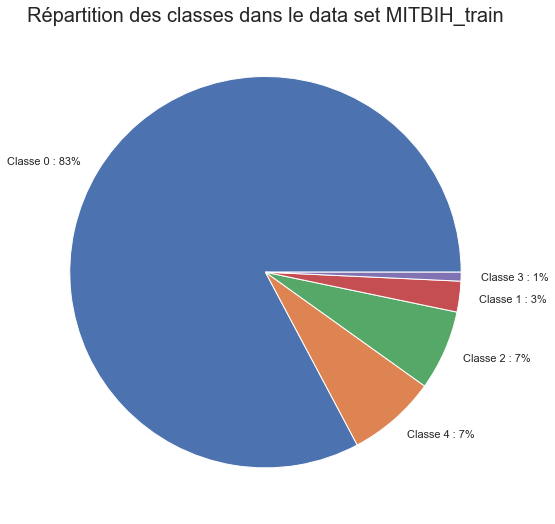

In [21]:
plt.figure(figsize = (16,9))
sns.set_theme()
plt.title("Répartition des classes dans le data set MITBIH_train", fontsize = 20)
plt.pie(y_train.value_counts(), labels = liste);

In [22]:
y_test.value_counts(normalize = True)

0.0    0.827608
4.0    0.073451
2.0    0.066143
1.0    0.025397
3.0    0.007400
Name: 187, dtype: float64

On voit que les classes sont déséquilibrées, la classe 0 est fortement majoritaire. Regardons l'impact sur les résultats du modèle.

In [23]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

C:\Users\Admin\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
pd.crosstab(y_test, y_pred, rownames = ["réel"], colnames = ["predict"])

predict,0.0,1.0,2.0,3.0,4.0
réel,,,,,
0.0,17833,23,227,9,26
1.0,383,147,25,0,1
2.0,885,12,505,10,36
3.0,118,0,15,29,0
4.0,195,0,29,1,1383


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     18118
         1.0       0.81      0.26      0.40       556
         2.0       0.63      0.35      0.45      1448
         3.0       0.59      0.18      0.27       162
         4.0       0.96      0.86      0.91      1608

    accuracy                           0.91     21892
   macro avg       0.78      0.53      0.60     21892
weighted avg       0.90      0.91      0.89     21892



Comme prévu, le modèle a tendance à largement prédire la classe 0. Ainsi les rappels des classes 1, 2 et 3 sont mauvaises. Nous voyons cependant que le rappel de la classe 4 est bonne. Rééquilibrons les classes à l'aide d'un undersampling et retestons notre modèle.

### Rééquilibrage des données

In [26]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [27]:
ru = RandomUnderSampler()

In [28]:
X_ru, y_ru = ru.fit_resample(X_train, y_train)

In [29]:
lr2 = LogisticRegression()

lr2.fit(X_ru, y_ru)
y_pred_ru = lr2.predict(X_test)


C:\Users\Admin\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
pd.crosstab(y_test, y_pred_ru, rownames = ["réel"], colnames = ["predict"])

predict,0.0,1.0,2.0,3.0,4.0
réel,,,,,
0.0,10895,2636,2429,1549,609
1.0,134,351,44,20,7
2.0,101,57,1061,148,81
3.0,10,1,10,141,0
4.0,61,3,72,10,1462


In [31]:
print(classification_report(y_test, y_pred_ru))

              precision    recall  f1-score   support

         0.0       0.97      0.60      0.74     18118
         1.0       0.12      0.63      0.19       556
         2.0       0.29      0.73      0.42      1448
         3.0       0.08      0.87      0.14       162
         4.0       0.68      0.91      0.78      1608

    accuracy                           0.64     21892
   macro avg       0.43      0.75      0.45     21892
weighted avg       0.88      0.64      0.71     21892



On a un meilleur rappel sur les classes 1, 2, 3 et 4 sur les données rééquilibrées mais on a tendance cette fois à sous prédire la classe 0. Par ailleurs la précision a été fortement dégradée.

## SVM

In [32]:
from sklearn.svm import SVC

In [33]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

pd.crosstab(y_test, svm_pred, rownames = ["reel"], colnames = ["predict"])

predict,0.0,1.0,2.0,3.0,4.0
reel,,,,,
0.0,18080,8,27,0,3
1.0,302,247,7,0,0
2.0,343,2,1100,0,3
3.0,136,0,7,19,0
4.0,187,0,9,0,1412


In [34]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     18118
         1.0       0.96      0.44      0.61       556
         2.0       0.96      0.76      0.85      1448
         3.0       1.00      0.12      0.21       162
         4.0       1.00      0.88      0.93      1608

    accuracy                           0.95     21892
   macro avg       0.97      0.64      0.71     21892
weighted avg       0.95      0.95      0.95     21892



In [35]:
svm = SVC()
svm.fit(X_ru, y_ru)
svm_pred_ru = svm.predict(X_test)

pd.crosstab(y_test, svm_pred_ru, rownames = ["reel"], colnames = ["predict"])

predict,0.0,1.0,2.0,3.0,4.0
reel,,,,,
0.0,12947,1819,1283,1751,318
1.0,145,360,28,21,2
2.0,128,39,1114,129,38
3.0,11,1,7,143,0
4.0,120,10,28,11,1439


In [36]:
print(classification_report(y_test, svm_pred_ru))

              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     18118
         1.0       0.16      0.65      0.26       556
         2.0       0.45      0.77      0.57      1448
         3.0       0.07      0.88      0.13       162
         4.0       0.80      0.89      0.85      1608

    accuracy                           0.73     21892
   macro avg       0.49      0.78      0.53     21892
weighted avg       0.90      0.73      0.79     21892



Nous observons de meilleurs résultats sur le rappel des classes 1, 2 et 3 avec le SVM lorsqu’on compare les algos entraînés respectivement avec le dataset d'entraînement non ré-échantillonné et le même dataset ré-échantillonné

## Modélisation Deep Learning

### Une première itération simple de Deep Learning

Utilisons dans un premier temps un réseau de neurones simples avec 4 couches.

In [37]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [38]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [39]:
inputs = Input(shape = X_train.shape[1], name = "Input")
dense1 = Dense(units = 10, activation = "tanh", name = "dense1", kernel_initializer="normal")
dense2 = Dense(units = 8, activation = "tanh", name = "dense2", kernel_initializer="normal")
dense3 = Dense(units = 6, activation = "tanh", name = "dense3", kernel_initializer="normal")
dense4 = Dense(units = 5, activation = "softmax", name = "dense4", kernel_initializer="normal")

x = dense1(inputs)
x = dense2(x)
x = dense3(x)
outputs = dense4(x)

model = Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 209)]             0         
_________________________________________________________________
dense1 (Dense)               (None, 10)                2100      
_________________________________________________________________
dense2 (Dense)               (None, 8)                 88        
_________________________________________________________________
dense3 (Dense)               (None, 6)                 54        
_________________________________________________________________
dense4 (Dense)               (None, 5)                 35        
Total params: 2,277
Trainable params: 2,277
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

On entraine sur le data set global :

In [41]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.1)

Epoch 1/10
2463/2463 [==============================] - 2s 704us/step - loss: 0.3655 - accuracy: 0.9238 - val_loss: 5.9911 - val_accuracy: 0.0389
Epoch 2/10
2463/2463 [==============================] - 2s 620us/step - loss: 0.2586 - accuracy: 0.9352 - val_loss: 5.9224 - val_accuracy: 0.1021
Epoch 3/10
2463/2463 [==============================] - 2s 618us/step - loss: 0.1665 - accuracy: 0.9546 - val_loss: 7.0715 - val_accuracy: 0.1464
Epoch 4/10
2463/2463 [==============================] - 2s 620us/step - loss: 0.1357 - accuracy: 0.9685 - val_loss: 8.1854 - val_accuracy: 0.1562
Epoch 5/10
2463/2463 [==============================] - 2s 618us/step - loss: 0.1201 - accuracy: 0.9715 - val_loss: 9.3150 - val_accuracy: 0.1513
Epoch 6/10
2463/2463 [==============================] - 2s 618us/step - loss: 0.1126 - accuracy: 0.9735 - val_loss: 10.1319 - val_accuracy: 0.1578
Epoch 7/10
2463/2463 [==============================] - 2s 617us/step - loss: 0.1082 - accuracy: 0.9749 - val_loss: 10.7865

In [42]:
test_pred_class = model.predict(X_test).argmax(axis = 1)

In [43]:
pd.crosstab(y_test, test_pred_class, rownames = ["reel"], colnames = ["predict"])

predict,0,1,2
reel,,,
0.0,18052,19,47
1.0,239,302,15
2.0,204,4,1240
3.0,118,1,43
4.0,1252,0,356


On entraine sur le dataset ré-échantillonné : 

In [44]:
model.fit(X_sm, y_sm, epochs = 10, batch_size = 32, validation_split = 0.1)

Epoch 1/10
10192/10192 [==============================] - 6s 631us/step - loss: 0.5277 - accuracy: 0.8139 - val_loss: 0.2871 - val_accuracy: 0.9098
Epoch 2/10
10192/10192 [==============================] - 6s 629us/step - loss: 0.3423 - accuracy: 0.8814 - val_loss: 0.2640 - val_accuracy: 0.9131
Epoch 3/10
10192/10192 [==============================] - 6s 624us/step - loss: 0.3046 - accuracy: 0.8952 - val_loss: 0.2137 - val_accuracy: 0.9235
Epoch 4/10
10192/10192 [==============================] - 6s 619us/step - loss: 0.2848 - accuracy: 0.9019 - val_loss: 0.1905 - val_accuracy: 0.9271
Epoch 5/10
10192/10192 [==============================] - 6s 625us/step - loss: 0.2717 - accuracy: 0.9077 - val_loss: 0.1701 - val_accuracy: 0.9395
Epoch 6/10
10192/10192 [==============================] - 6s 624us/step - loss: 0.2627 - accuracy: 0.9114 - val_loss: 0.1840 - val_accuracy: 0.9342
Epoch 7/10
10192/10192 [==============================] - 6s 626us/step - loss: 0.2557 - accuracy: 0.9141 - val_

In [45]:
nn_pred_ru = model.predict(X_test).argmax(axis=1)

pd.crosstab(y_test, nn_pred_ru)

col_0,0,1,2,3,4
187,,,,,
0.0,15126,1346,495,968,183
1.0,88,429,18,15,6
2.0,81,20,1268,65,14
3.0,8,2,7,145,0
4.0,65,20,28,18,1477


In [46]:
print(classification_report(y_test, nn_pred_ru))

              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90     18118
         1.0       0.24      0.77      0.36       556
         2.0       0.70      0.88      0.78      1448
         3.0       0.12      0.90      0.21       162
         4.0       0.88      0.92      0.90      1608

    accuracy                           0.84     21892
   macro avg       0.58      0.86      0.63     21892
weighted avg       0.93      0.84      0.88     21892



### Itération CNN

In [47]:
inputs = Input(shape = (X_train.shape[1],1), name = "Input")
conv1_cnn = Conv1D(filters = 32, kernel_size = 5, padding = "valid", activation = "relu")
pool1_cnn = MaxPooling1D(pool_size = 2)
dropout_cnn = Dropout(rate=0.2)
flatten_cnn = Flatten()
dense1_cnn = Dense(units = 128, activation="relu")
dense2_cnn = Dense(units = 5, activation="softmax")

x_cnn = conv1_cnn(inputs)
x_cnn = pool1_cnn(x_cnn)
x_cnn = dropout_cnn(x_cnn)
x_cnn = flatten_cnn(x_cnn)
x_cnn = dense1_cnn(x_cnn)
outputs = dense2_cnn(x_cnn)


model_cnn = Model(inputs = inputs, outputs = outputs)
model_cnn.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model_cnn.fit(X_train, y_train, epochs = 10, batch_size = 200, validation_split = 0.2)

Epoch 1/10
351/351 [==============================] - 14s 40ms/step - loss: 0.0152 - accuracy: 0.9974 - val_loss: 15.0214 - val_accuracy: 0.1387
Epoch 2/10
351/351 [==============================] - 14s 40ms/step - loss: 2.7205e-07 - accuracy: 1.0000 - val_loss: 15.1826 - val_accuracy: 0.1387
Epoch 3/10
351/351 [==============================] - 14s 39ms/step - loss: 2.0502e-07 - accuracy: 1.0000 - val_loss: 15.5377 - val_accuracy: 0.1387
Epoch 4/10
351/351 [==============================] - 14s 39ms/step - loss: 1.1956e-07 - accuracy: 1.0000 - val_loss: 16.0881 - val_accuracy: 0.1387
Epoch 5/10
351/351 [==============================] - 14s 39ms/step - loss: 5.7607e-08 - accuracy: 1.0000 - val_loss: 16.6716 - val_accuracy: 0.1387
Epoch 6/10
351/351 [==============================] - 14s 39ms/step - loss: 2.8264e-08 - accuracy: 1.0000 - val_loss: 17.1907 - val_accuracy: 0.1387
Epoch 7/10
351/351 [==============================] - 14s 39ms/step - loss: 1.5896e-08 - accuracy: 1.0000 - va

In [48]:
pred_test_cnn = model_cnn.predict(X_test).argmax(1)


In [49]:
pd.crosstab(y_test.argmax(1), pred_test_cnn, rownames = ["reel"], colnames = ["predict"])

predict,0
reel,
0,18118
1,556
2,1448
3,162
4,1608


In [50]:
print(classification_report(y_test.argmax(1), pred_test_cnn))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     18118
           1       0.00      0.00      0.00       556
           2       0.00      0.00      0.00      1448
           3       0.00      0.00      0.00       162
           4       0.00      0.00      0.00      1608

    accuracy                           0.83     21892
   macro avg       0.17      0.20      0.18     21892
weighted avg       0.68      0.83      0.75     21892



C:\Users\Admin\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
y_sm = to_categorical(y_sm)
model_cnn.fit(X_sm, y_sm, epochs = 10, batch_size = 200, validation_split = 0.2)
pred_test_cnn_sm = model_cnn.predict(X_test).argmax(1)
pd.crosstab(y_test.argmax(1), pred_test_cnn_sm, rownames = ["reel"], colnames = ["predict"])

Epoch 1/10
1450/1450 [==============================] - 56s 39ms/step - loss: 0.3303 - accuracy: 0.8878 - val_loss: 0.3334 - val_accuracy: 0.9054
Epoch 2/10
1450/1450 [==============================] - 36s 25ms/step - loss: 0.1657 - accuracy: 0.9430 - val_loss: 0.2322 - val_accuracy: 0.9277
Epoch 3/10
1450/1450 [==============================] - 42s 29ms/step - loss: 0.1319 - accuracy: 0.9545 - val_loss: 0.1723 - val_accuracy: 0.9430
Epoch 4/10
1450/1450 [==============================] - 56s 39ms/step - loss: 0.1133 - accuracy: 0.9611 - val_loss: 0.1499 - val_accuracy: 0.9497
Epoch 5/10
1450/1450 [==============================] - 56s 39ms/step - loss: 0.0992 - accuracy: 0.9653 - val_loss: 0.1043 - val_accuracy: 0.9617
Epoch 6/10
1450/1450 [==============================] - 56s 39ms/step - loss: 0.0892 - accuracy: 0.9693 - val_loss: 0.0846 - val_accuracy: 0.9693
Epoch 7/10
1450/1450 [==============================] - 57s 39ms/step - loss: 0.0816 - accuracy: 0.9717 - val_loss: 0.0953 -

predict,0,1,2,3,4
reel,,,,,
0,17573,366,93,71,15
1,96,450,10,0,0
2,33,10,1373,30,2
3,12,3,8,139,0
4,42,7,13,1,1545


In [52]:
print(classification_report(y_test.argmax(1), pred_test_cnn_sm))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     18118
           1       0.54      0.81      0.65       556
           2       0.92      0.95      0.93      1448
           3       0.58      0.86      0.69       162
           4       0.99      0.96      0.97      1608

    accuracy                           0.96     21892
   macro avg       0.80      0.91      0.84     21892
weighted avg       0.97      0.96      0.97     21892



### Itération LeNet

In [53]:
inputs = Input(shape = (X_train.shape[1],1), name = "Input")
conv1_lenet = Conv1D(filters = 32, kernel_size = 5, padding = "valid", activation = "relu")
pool1_lenet = MaxPooling1D(pool_size = 2)
conv2_lenet = Conv1D(filters = 16, kernel_size = 3, padding = "valid", activation = "relu")
pool2_lenet = MaxPooling1D(pool_size = 2)
dropout_lenet = Dropout(rate=0.2)
flatten_lenet = Flatten()
dense1_lenet = Dense(units = 128, activation="relu")
dense2_lenet = Dense(units = 5, activation="softmax")

x = conv1_lenet(inputs)
x = pool1_lenet(x)
x = conv2_lenet(x)
x = pool2_lenet(x)
x = dropout_lenet(x)
x = flatten_lenet(x)
x = dense1_lenet(x)
outputs = dense2_lenet(x)


model_lenet = Model(inputs = inputs, outputs = outputs)
model_lenet.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

model_lenet.fit(X_train, y_train, epochs = 10, batch_size = 200, validation_split = 0.2)

Epoch 1/10
351/351 [==============================] - 26s 72ms/step - loss: 0.0355 - accuracy: 0.9977 - val_loss: 15.4562 - val_accuracy: 0.1387
Epoch 2/10
351/351 [==============================] - 19s 55ms/step - loss: 1.7089e-07 - accuracy: 1.0000 - val_loss: 15.4794 - val_accuracy: 0.1387
Epoch 3/10
351/351 [==============================] - 16s 46ms/step - loss: 1.6552e-07 - accuracy: 1.0000 - val_loss: 15.5117 - val_accuracy: 0.1387
Epoch 4/10
351/351 [==============================] - 14s 39ms/step - loss: 1.5635e-07 - accuracy: 1.0000 - val_loss: 15.5520 - val_accuracy: 0.1387
Epoch 5/10
351/351 [==============================] - 15s 42ms/step - loss: 1.4751e-07 - accuracy: 1.0000 - val_loss: 15.6006 - val_accuracy: 0.1387
Epoch 6/10
351/351 [==============================] - 25s 71ms/step - loss: 1.3680e-07 - accuracy: 1.0000 - val_loss: 15.6570 - val_accuracy: 0.1387
Epoch 7/10
351/351 [==============================] - 25s 71ms/step - loss: 1.2632e-07 - accuracy: 1.0000 - va

In [54]:
pred_test_lenet = model_cnn.predict(X_test).argmax(1)
pd.crosstab(y_test.argmax(1), pred_test_lenet, rownames = ["reel"], colnames = ["predict"])

predict,0,1,2,3,4
reel,,,,,
0,17573,366,93,71,15
1,96,450,10,0,0
2,33,10,1373,30,2
3,12,3,8,139,0
4,42,7,13,1,1545


In [55]:
print(classification_report(y_test.argmax(1), pred_test_lenet))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     18118
           1       0.54      0.81      0.65       556
           2       0.92      0.95      0.93      1448
           3       0.58      0.86      0.69       162
           4       0.99      0.96      0.97      1608

    accuracy                           0.96     21892
   macro avg       0.80      0.91      0.84     21892
weighted avg       0.97      0.96      0.97     21892



In [56]:
model_lenet.fit(X_sm, y_sm, epochs = 10, batch_size = 200, validation_split = 0.2)
pred_test_lenet_sm = model_lenet.predict(X_test).argmax(1)
pd.crosstab(y_test.argmax(1), pred_test_lenet_sm, rownames = ["reel"], colnames = ["predict"])

Epoch 1/10
1450/1450 [==============================] - 104s 72ms/step - loss: 0.4844 - accuracy: 0.8270 - val_loss: 0.4221 - val_accuracy: 0.8915
Epoch 2/10
1450/1450 [==============================] - 61s 42ms/step - loss: 0.2698 - accuracy: 0.9025 - val_loss: 0.3646 - val_accuracy: 0.8967
Epoch 3/10
1450/1450 [==============================] - 103s 71ms/step - loss: 0.2188 - accuracy: 0.9211 - val_loss: 0.2630 - val_accuracy: 0.9155
Epoch 4/10
1450/1450 [==============================] - 104s 72ms/step - loss: 0.1854 - accuracy: 0.9331 - val_loss: 0.2501 - val_accuracy: 0.9178
Epoch 5/10
1450/1450 [==============================] - 102s 71ms/step - loss: 0.1607 - accuracy: 0.9434 - val_loss: 0.2180 - val_accuracy: 0.9272
Epoch 6/10
1450/1450 [==============================] - 103s 71ms/step - loss: 0.1414 - accuracy: 0.9501 - val_loss: 0.1675 - val_accuracy: 0.9431
Epoch 7/10
1450/1450 [==============================] - 106s 73ms/step - loss: 0.1280 - accuracy: 0.9546 - val_loss: 0.

predict,0,1,2,3,4
reel,,,,,
0,17420,455,130,99,14
1,91,453,7,5,0
2,43,8,1361,35,1
3,13,1,5,143,0
4,58,10,22,5,1513


In [57]:
print(classification_report(y_test.argmax(1), pred_test_lenet_sm))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     18118
           1       0.49      0.81      0.61       556
           2       0.89      0.94      0.92      1448
           3       0.50      0.88      0.64       162
           4       0.99      0.94      0.96      1608

    accuracy                           0.95     21892
   macro avg       0.77      0.91      0.82     21892
weighted avg       0.97      0.95      0.96     21892

